# **1.Defining the Question**

**a).Specifying the Question**

Hass Consulting Company requires us to study the factors that affect housing prices using the given information on real estate properties and to create a model that would allow the company to accurately predict the sale of prices with the predictor variables provided.

**b).Defining the Metrics For Success**

Our project will be considered successful if we are able to show the influence of the different factors on the housing prices and create a model that can predict the prices given predictor variables.

**c).Understandng the Context**


Hass Consulting Company is a real estate leader with over 25 years of experience.

Real estate is real property that consists of land and improvements, which include buildings, fixtures, roads, structures, and utility systems. Property rights give a title of ownership to the land, improvements, and natural resources such as minerals, plants, animals, water, etc.

There are a number of factors that impact real estate prices, availability, and investment potential. these factors include, the size of the house and the location.

Therefore for us to predict the price of a house we need to consider the factors outlined in our dataset.

The dataset used for this analysis can be found here: [http://bit.ly/IndependentProjectWeek7Dataset]

**d).Recording the Experimental Design**

The following procedure was followed:

Data importation

Data Reading & Cleaning

Exploratory Data Analysis(Univariate,Bivariate,Multivariate Analysi

Multiple Linear Regression

a.Checking multicollinearity 

b.Residual plots

c.Assess Heteroskedasticity using Barlett's test.

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression

**e).Data Relevance**

This will be discussed after the analysis and prediction has been completed

# **2.Reading the Data**

**Importing our Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import scipy as sp

**Loading the Data**

In [ ]:
#Loading the dataset to our working environment

df=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")


# **3.Checking the Data**



In [ ]:
#previewing the top of our dataset
df.head()

In [ ]:
#previewing the bottom of our dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#determining the number of records of our dataset
df.shape

(21613, 20)

In [ ]:
#checking the columns in the dataset
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#checking the statistic summaries of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **4.Tidying the Dataset**

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the above output we have no null values in our dataset

In [ ]:
#checking for duplicates
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

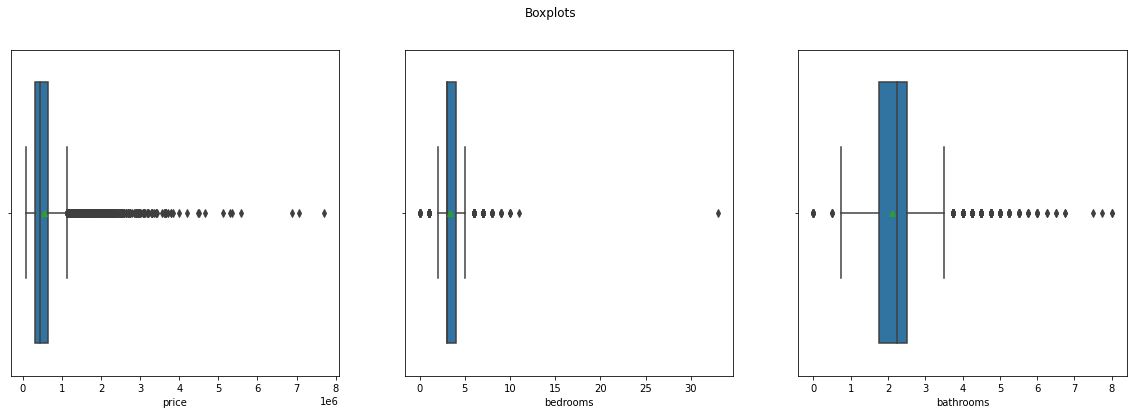

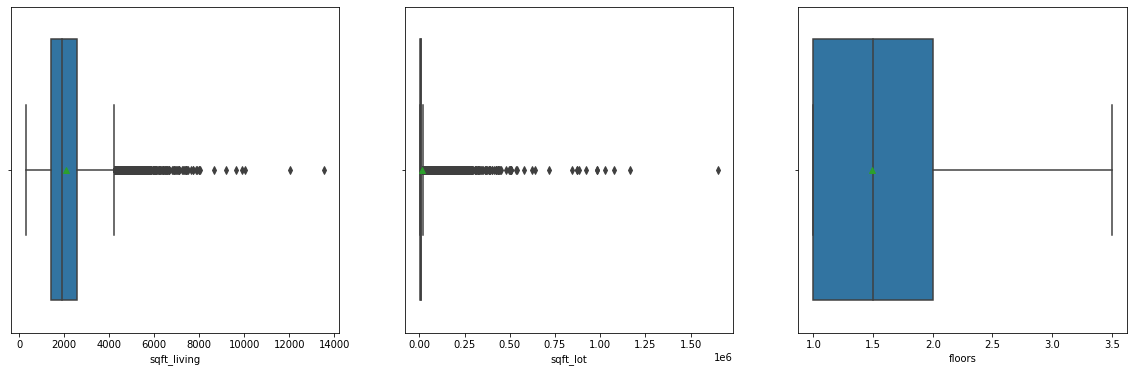

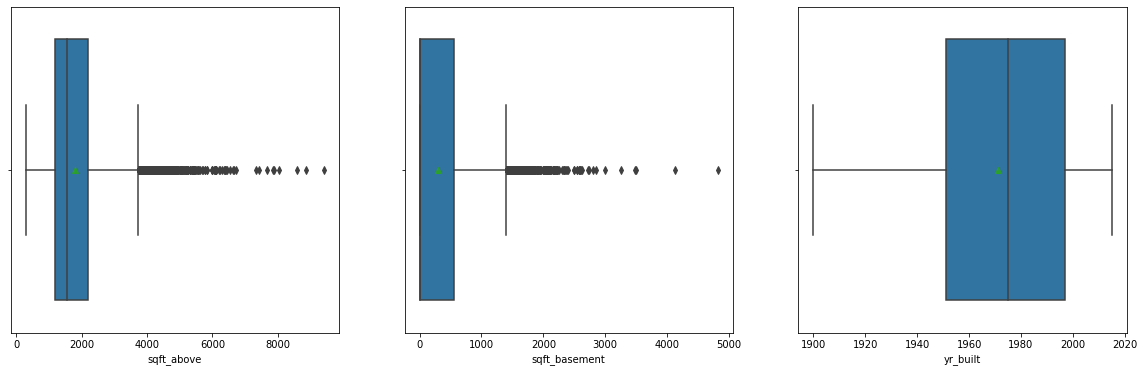

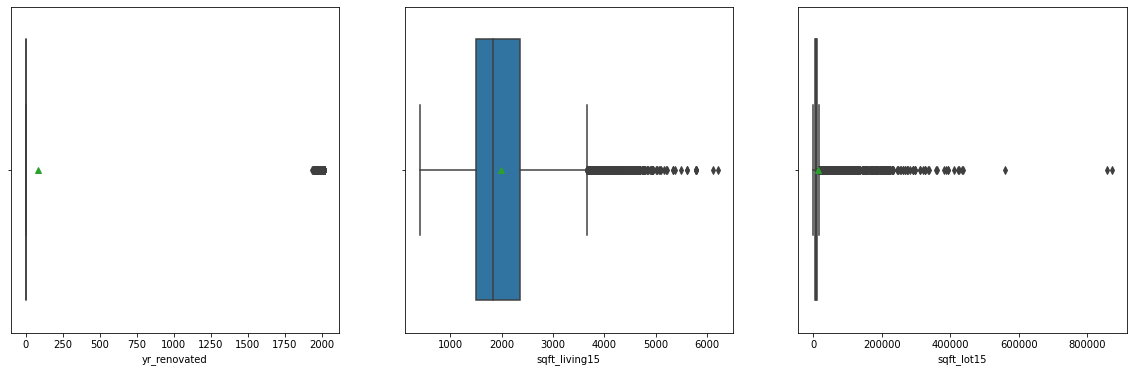

In [ ]:
#checking for Outliers and Anomalies in the dataset(numerical columns)
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = df['price'], ax=ax1, showmeans = True)
sns.boxplot(x = df['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = df['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = df['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = df['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = df['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = df['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x = df['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x = df['yr_built'], ax=ax9, showmeans = True)

fig, (ax10,ax11,ax12) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = df['yr_renovated'], ax=ax10, showmeans = True)
sns.boxplot(x = df['sqft_living15'], ax=ax11, showmeans = True)
sns.boxplot(x = df['sqft_lot15'], ax=ax12, showmeans = True)

plt.show()

We have a significant amount of outliers and are going to be dealt with while building the predictive models.

# **5.Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
# Ploting the univariate summaries and recording our observations
def sum_stats(df1):
  df2 = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df1[col]):
      df2.loc[col] = [df1[col].count(), df1[col].isnull().sum(), df1[col].nunique(), df1[col].mode().values[0], df1[col].mean(), df1[col].min(), 
                         df1[col].quantile(0.25), df1[col].median(), df1[col].quantile(0.75), df1[col].max(), df1[col].std(), df1[col].skew(), df1[col].kurt()]

    else:
     df2.loc[col] = [df1[col].count(), df1[col].isnull().sum(), df1[col].nunique(),df1[col].mode.values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return df2

sum_stats(df)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
id,21610.0,0.0,21436.0,7.950006e+08,4.580161e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,2.876547e+09,0.243414,-1.260438
price,21610.0,0.0,3625.0,3.500000e+05,5.401789e+05,7.500000e+04,3.216125e+05,4.500000e+05,6.450000e+05,7.700000e+06,3.673876e+05,4.021467,34.517438
bedrooms,21610.0,0.0,13.0,3.000000e+00,3.370847e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,9.301097e-01,1.974244,49.060108
bathrooms,21610.0,0.0,30.0,2.500000e+00,2.114739e+00,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,7.702037e-01,0.511164,1.279637
sqft_living,21610.0,0.0,1038.0,1.300000e+03,2.079881e+03,2.900000e+02,1.425500e+03,1.910000e+03,2.550000e+03,1.354000e+04,9.185003e+02,1.471532,5.242223
sqft_lot,21610.0,0.0,9782.0,5.000000e+03,1.510829e+04,5.200000e+02,5.040000e+03,7.619000e+03,1.068875e+04,1.651359e+06,4.142323e+04,13.059170,285.040621
floors,21610.0,0.0,6.0,1.000000e+00,1.494239e+00,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,5.399935e-01,0.616523,-0.484246
waterfront,21610.0,0.0,2.0,0.000000e+00,7.542804e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.652316e-02,11.384300,127.614090
view,21610.0,0.0,5.0,0.000000e+00,2.341971e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.661365e-01,3.396872,10.902118
condition,21610.0,0.0,5.0,3.000000e+00,3.409440e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.507639e-01,1.032789,0.525688


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6346f3dd0>,
      dtype=object)

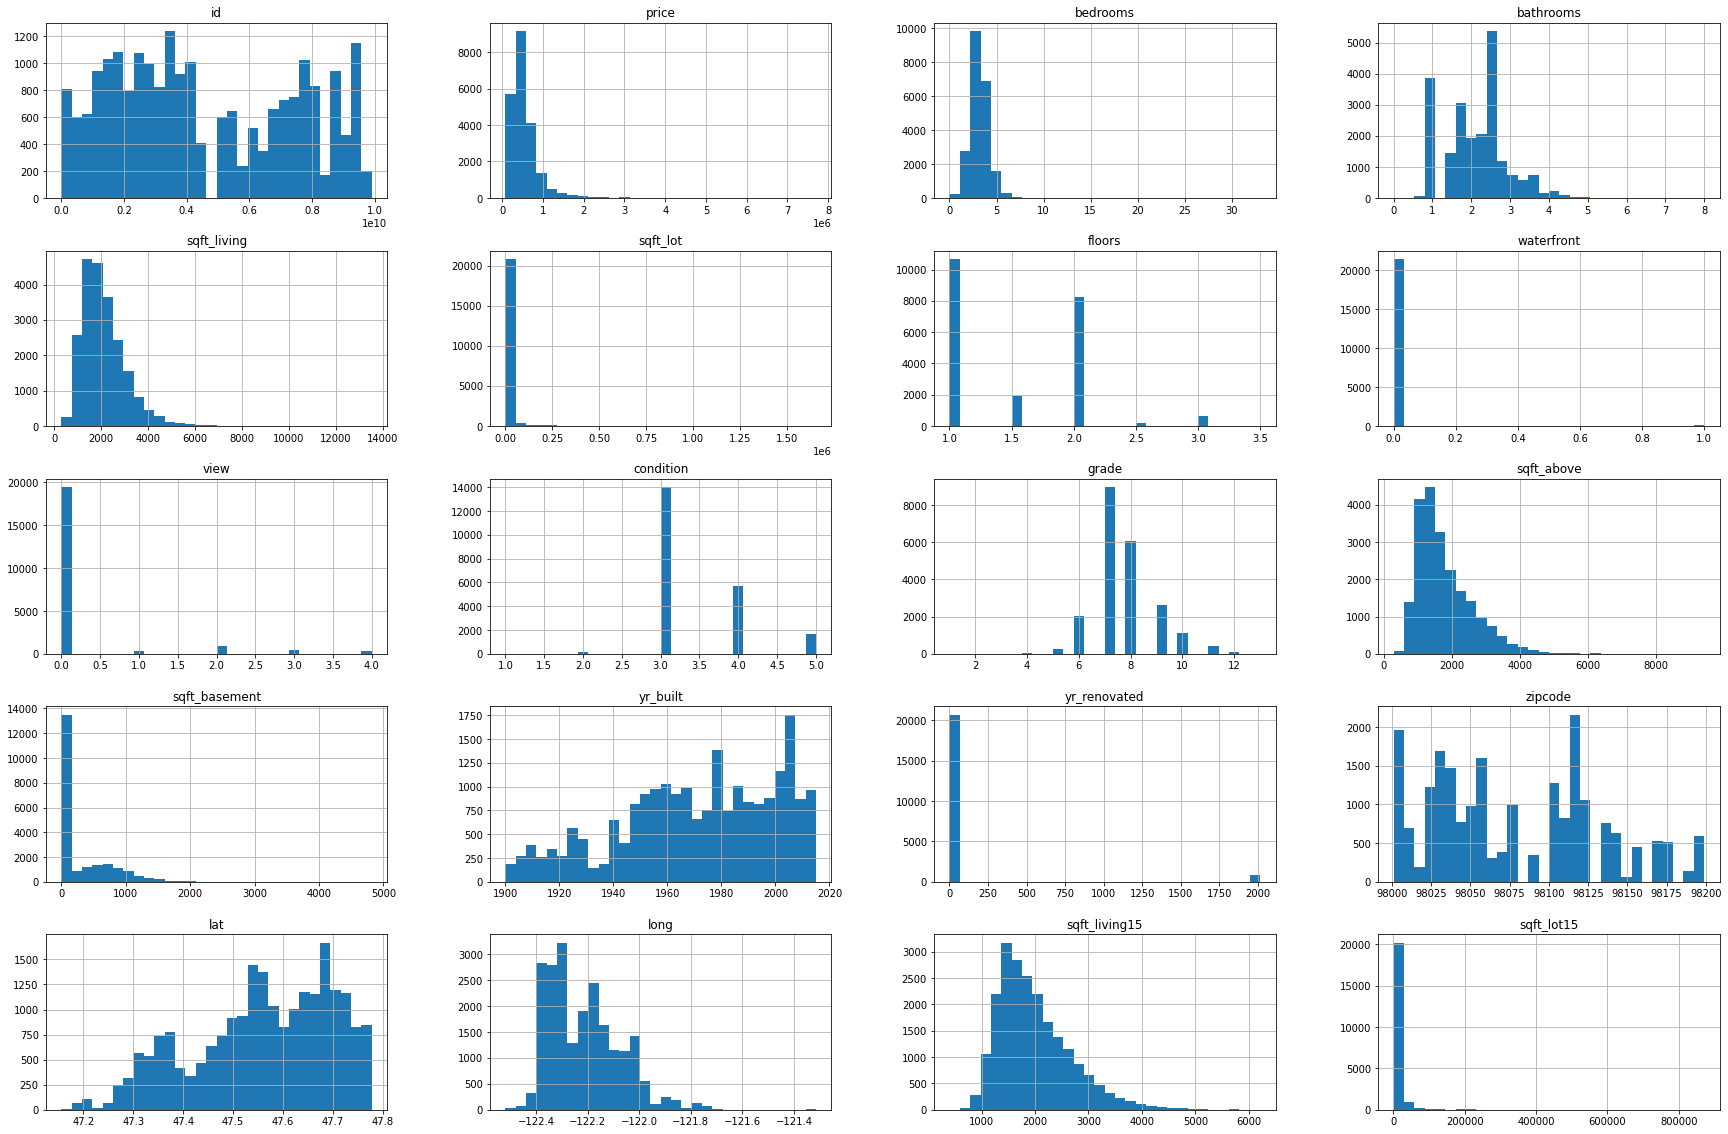

In [ ]:
#checking the distributions of our data
df.hist(bins=30, figsize=(30, 20))

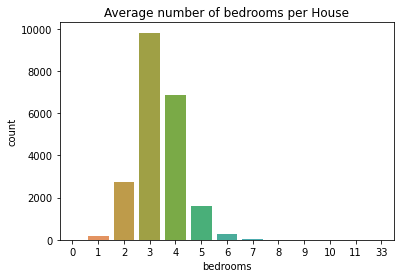

In [ ]:
#count plot showing average number of bedrooms per house 
sns.countplot(x='bedrooms',data=df)
plt.title('Average number of bedrooms per House')
plt.show()

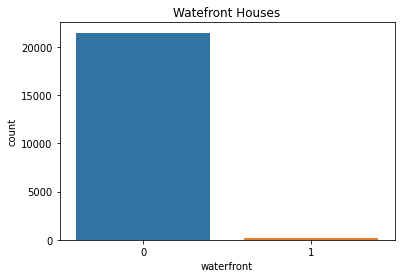

In [ ]:
#Count plots showing waterfront houses
sns.countplot(x='waterfront',data=df)
plt.title('Watefront Houses')
plt.show()

From the sumary above majority of the houses do not have waterfronts.

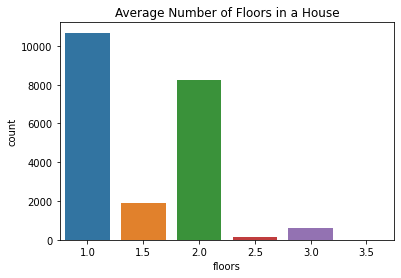

In [ ]:
#Count plots showing average number of floors in a house
sns.countplot(x='floors',data=df)
plt.title('Average Number of Floors in a House')
plt.show()

Majority of the houses have 1&2 floors.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

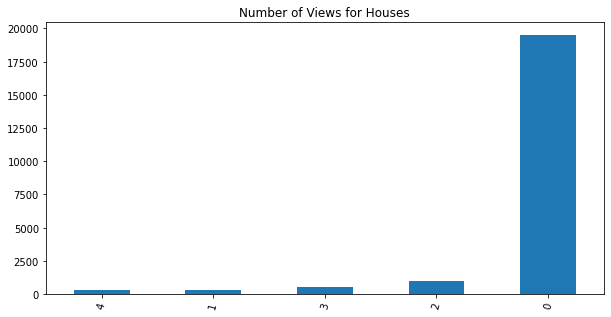

In [ ]:
#bar graph showing number of views for houses

df.view.value_counts().sort_values().plot.bar(figsize=(10,5))
plt.title('Number of Views for Houses')
degrees = 75
plt.xticks(rotation=degrees)



we can note that most of the houses were not viewes.The reason could be the limited time of the data collection.

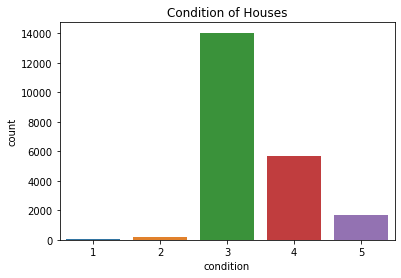

In [ ]:
#Count plots for condition of the houses
sns.countplot(x='condition',data=df)
plt.title('Condition of Houses')
plt.show()

From the output we can note that majority of the houses have an average condition:not really new and not too old.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

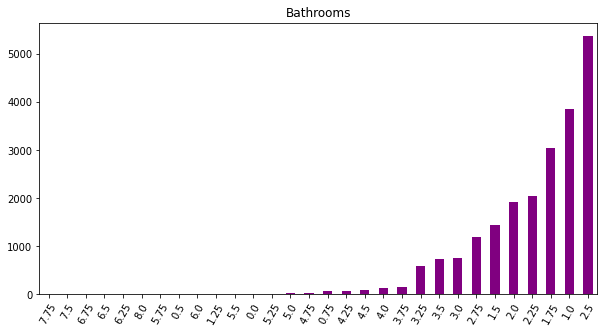

In [ ]:
df.bathrooms.value_counts().sort_values().plot.bar(figsize=(10,5), color='purple')
plt.title('Bathrooms')
degrees = 60
plt.xticks(rotation=degrees)
#houses with 2.5 bedrooms are many comared to all the oth

Most of the houses have an average of 1-2.5 bathrooms

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

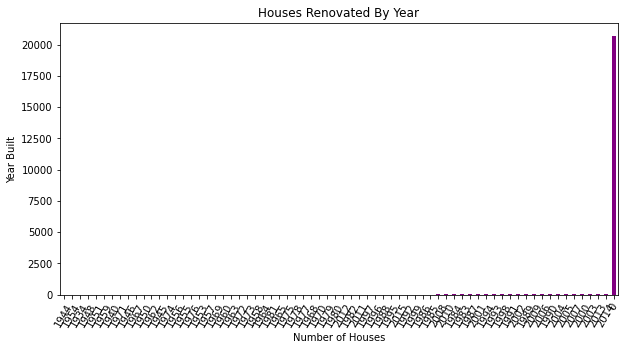

In [ ]:
#bar graph showing renovations per year
df.yr_renovated.value_counts().sort_values().plot.bar(figsize=(10,5), color='purple')
plt.xlabel('Number of Houses')
plt.ylabel('Year Built')
plt.title('Houses Renovated By Year')
degrees = 60
plt.xticks(rotation=degrees)

In [ ]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

Majority of the houses have not been renovated hence we can conclude that most of the houses were built in recent years and did not require any renovations.

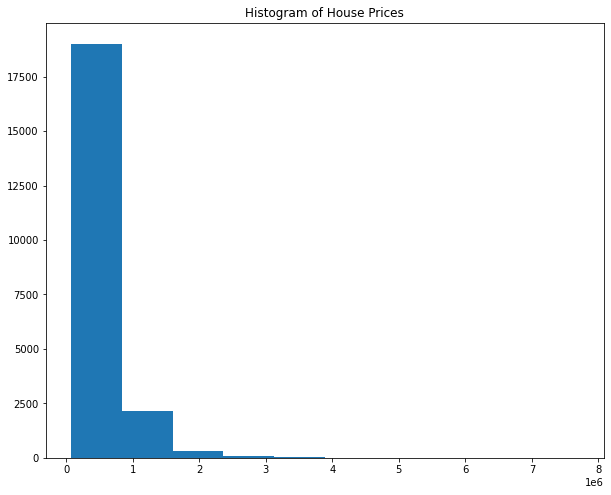

In [ ]:
#Histogram of house prices
plt.figure(figsize = [10,8])
plt.hist(df['price'])
plt.title('Histogram of House Prices')
plt.show()

**Bivariate Analysis**

In [ ]:
#statistic summaries of our dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 432x288 with 0 Axes>

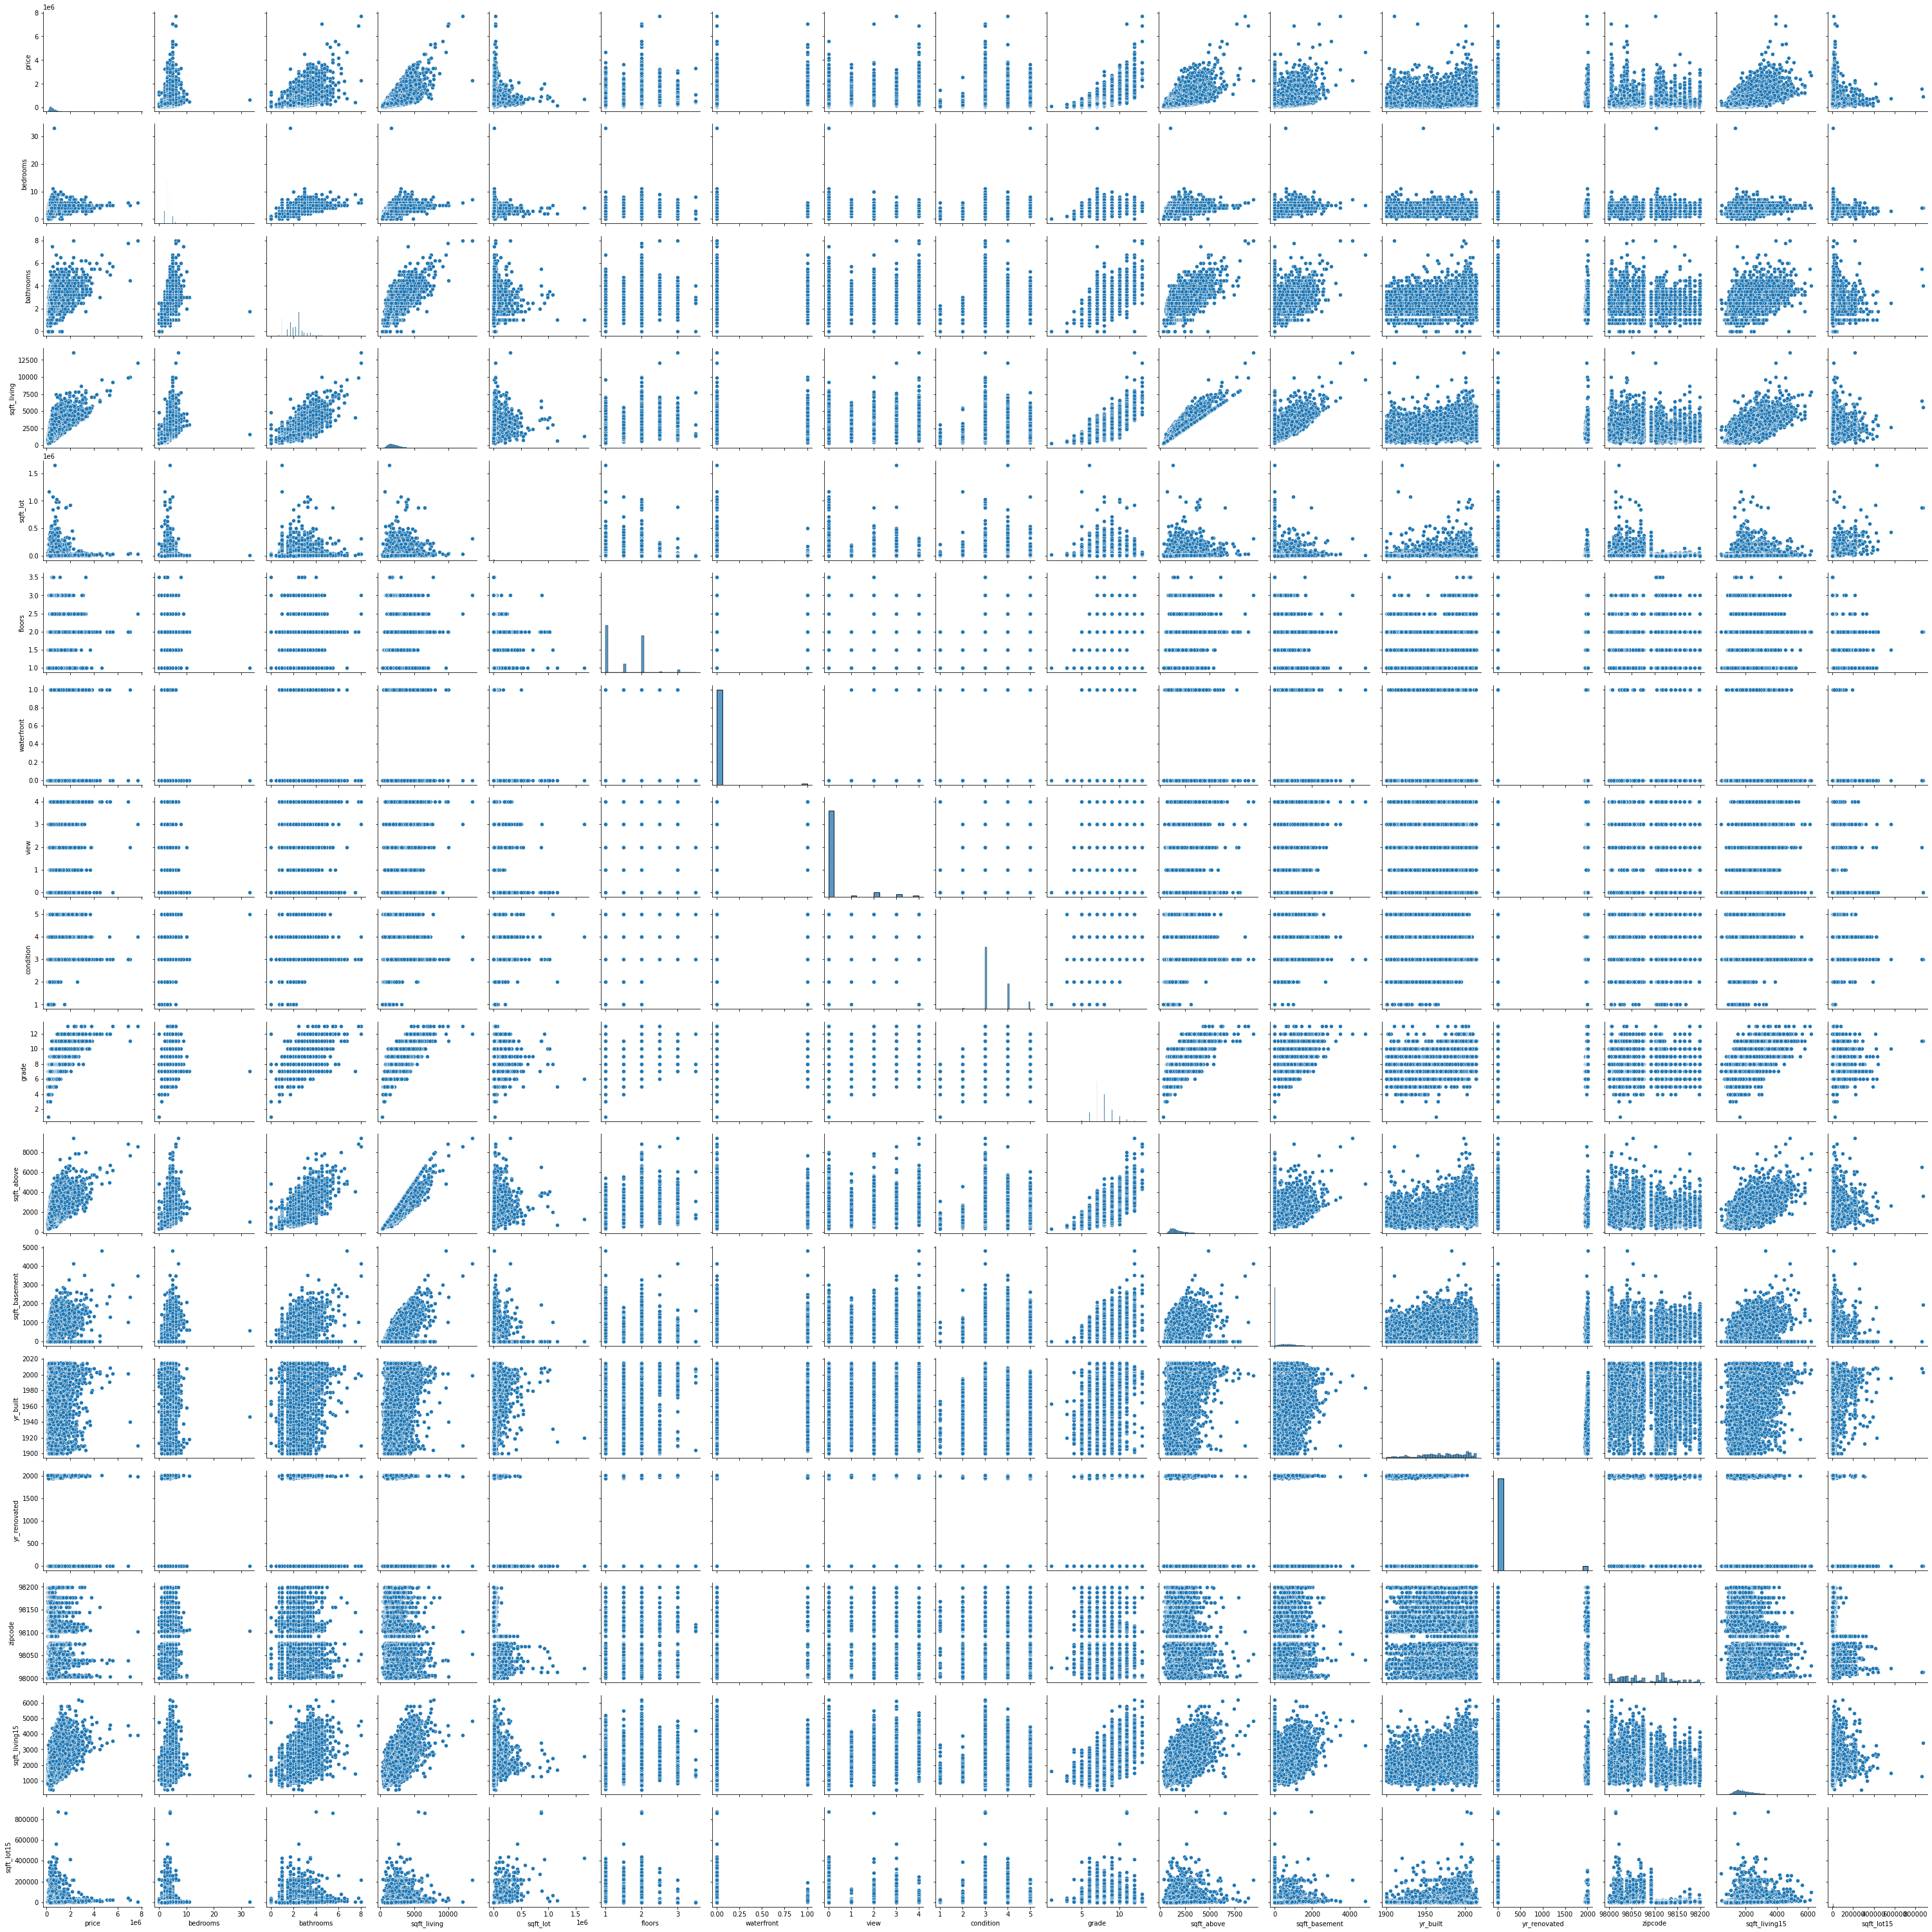

In [ ]:
#create df's to plot pairplot(leaving out id and long and lat)
df_plot = df.drop(['id', 'lat', 'long'], axis=1)
df_plot

# Plot the pairplot
plt.figure()
sns.pairplot(df_plot)
plt.show()

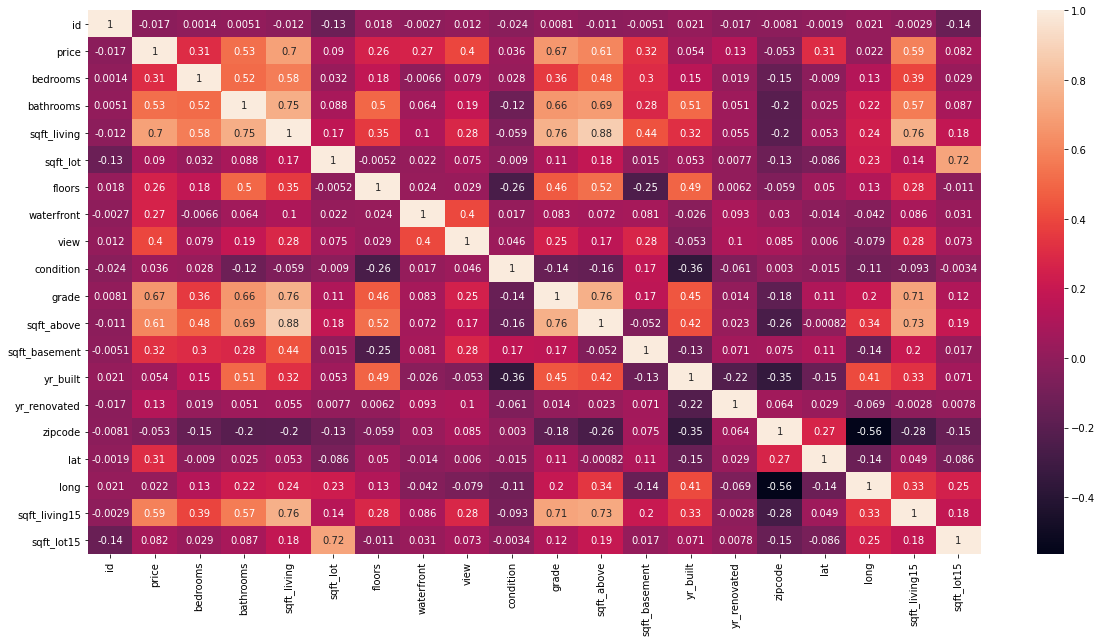

In [ ]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Price has a high positive correlation with sqft_living, grade and sqft_above
#sqft_living has a high positive correlation with bathrooms, sqft_above and grade, sqft_living15
#sqft_lot and sqft_lot15 are highly correlated
#grade has a high correlation with sqft_living, sqft_above and sqft_living15

**Multivariate Analysis**

In [ ]:
# creating a copy of our dataframe for feature reduction
pca = df.copy(deep=True)

In [ ]:
#featurs
x = pca.drop(['price'], axis= 1) # features
y = pca['price'] #target variable

from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [ ]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [ ]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.75338016e-01, 1.15340617e-01, 9.93818274e-02, 7.21949181e-02,
       6.47836963e-02, 5.32658556e-02, 5.00830374e-02, 4.54493586e-02,
       4.37523853e-02, 3.47184172e-02, 3.13533971e-02, 2.64754763e-02,
       2.12750748e-02, 1.69968928e-02, 1.43738848e-02, 1.33575181e-02,
       1.18006803e-02, 1.00589476e-02, 4.03972763e-33])

In [63]:
# The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 
# Ideally, you would choose the number of components to include in your model by adding the explained variance ratio 
# of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

features = [2.75338016e-01+ 1.15340617e-01+ 9.93818274e-02+ 7.21949181e-02+
       6.47836963e-02+ 5.32658556e-02+ 5.00830374e-02]# 4.54493586e-02+4.37523853e-02+ 3.47184172e-02+ 3.13533971e-02+ 2.64754763e-02+2.12750748e-02+ 1.69968928e-02+ 1.43738848e-02+ 1.33575181e-02+1.18006803e-02+ 1.00589476e-02+ 4.03972763e-33]


features
# This suggests that the first 7 features indicate the most determining features to house prices i.e. index 0 to 6 of x.info()
# these features are bedrooms, bathrooms,  sqft_living, sqft_lot,  floors, waterfront, and number of views.

[0.7303879678]

**Data Pre-Processing**

In [ ]:
# creating a copy
house_df = df.copy()

**Dealing with outliers and anomalies**

In [ ]:
#Dealing with anomalies
def outlier_determination(d_column):
 sorted(d_column)
 Q1,Q3 = np.percentile(d_column, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#sqft_living15
lowerbound,upperbound = outlier_determination(house_df.sqft_living15)
print('sqft_living15: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's

q_10 = house_df['sqft_living15'].quantile(0.10)
q_90 = house_df['sqft_living15'].quantile(0.90)

house_df['sqft_living15'] = np.where(house_df['sqft_living15'] <q_10, q_10,house_df['sqft_living15'])
house_df['sqft_living15'] = np.where(house_df['sqft_living15'] >q_90, q_90,house_df['sqft_living15'])


# sqft_basement
lowerbound,upperbound = outlier_determination(house_df.sqft_basement)
print('sqft_basement: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_df['sqft_basement'].quantile(0.10)
q_90 = house_df['sqft_basement'].quantile(0.90)

house_df['sqft_living15'] = np.where(house_df['sqft_basement'] <q_10, q_10,house_df['sqft_basement'])
house_df['sqft_living15'] = np.where(house_df['sqft_basement'] >q_90, q_90,house_df['sqft_basement'])


# sqft_lot15
lowerbound,upperbound = outlier_determination(house_df.sqft_lot15)
print('sqft_lot15: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_df['sqft_lot15'].quantile(0.10)
q_90 = house_df['sqft_lot15'].quantile(0.90)

house_df['sqft_lot15'] = np.where(house_df['sqft_lot15'] <q_10, q_10,house_df['sqft_lot15'])
house_df['sqft_lot15'] = np.where(house_df['sqft_lot15'] >q_90, q_90,house_df['sqft_lot15'])


# sqft_above
lowerbound,upperbound = outlier_determination(house_df.sqft_above)
print('sqft_above: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_df['sqft_above'].quantile(0.10)
q_90 = house_df['sqft_above'].quantile(0.90)

house_df['sqft_above'] = np.where(house_df['sqft_above'] <q_10, q_10,house_df['sqft_above'])
house_df['sqft_above'] = np.where(house_df['sqft_above'] >q_90, q_90,house_df['sqft_above'])


# sqft_living
lowerbound,upperbound = outlier_determination(house_df.sqft_living)
print('sqft_living: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_df['sqft_living'].quantile(0.10)
q_90 = house_df['sqft_living'].quantile(0.90)

house_df['sqft_living'] = np.where(house_df['sqft_living'] <q_10, q_10,house_df['sqft_living'])
house_df['sqft_living'] = np.where(house_df['sqft_living'] >q_90, q_90,house_df['sqft_living'])


# sqft_lot
lowerbound,upperbound = outlier_determination(house_df.sqft_lot)
print('sqft_lot: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_df['sqft_lot'].quantile(0.10)
q_90 = house_df['sqft_lot'].quantile(0.90)

house_df['sqft_lot'] = np.where(house_df['sqft_lot'] <q_10, q_10,house_df['sqft_lot'])
house_df['sqft_lot'] = np.where(house_df['sqft_lot'] >q_90, q_90,house_df['sqft_lot'])


# sqft_bedrooms
lowerbound,upperbound = outlier_determination(house_df.bedrooms)
print('bedrooms: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_df['bedrooms'].quantile(0.10)
q_90 = house_df['bedrooms'].quantile(0.90)

house_df['bedrooms'] = np.where(house_df['bedrooms'] <q_10, q_10,house_df['bedrooms'])
house_df['bedrooms'] = np.where(house_df['bedrooms'] >q_90, q_90,house_df['bedrooms'])

# sqft_bathrooms
lowerbound,upperbound = outlier_determination(house_df.bathrooms)
print('bathrooms: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_df['bathrooms'].quantile(0.10)
q_90 = house_df['bathrooms'].quantile(0.90)

house_df['bathrooms'] = np.where(house_df['bathrooms'] <q_10, q_10,house_df['bathrooms'])
house_df['bathrooms'] = np.where(house_df['bathrooms'] >q_90, q_90,house_df['bathrooms'])

# Price
lowerbound,upperbound = outlier_determination(house_df.price)
print('price: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_df['price'].quantile(0.10)
q_90 = house_df['price'].quantile(0.90)

house_df['price'] = np.where(house_df['price'] <q_10, q_10,house_df['price'])
house_df['price'] = np.where(house_df['price'] >q_90, q_90,house_df['price'])


sqft_living15:  185.0 , 3665.0
sqft_basement:  -840.0 , 1400.0
sqft_lot15:  -2374.5 , 17557.5
sqft_above:  -340.0 , 3740.0
sqft_living:  -261.25 , 4236.75
sqft_lot:  -3433.125 , 19161.875
bedrooms:  1.5 , 5.5
bathrooms:  0.625 , 3.625
price:  -163468.75 , 1130081.25


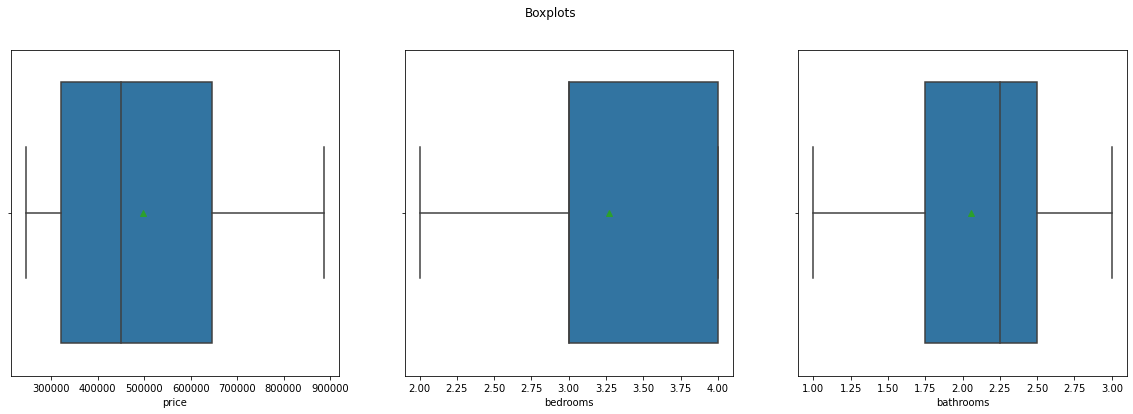

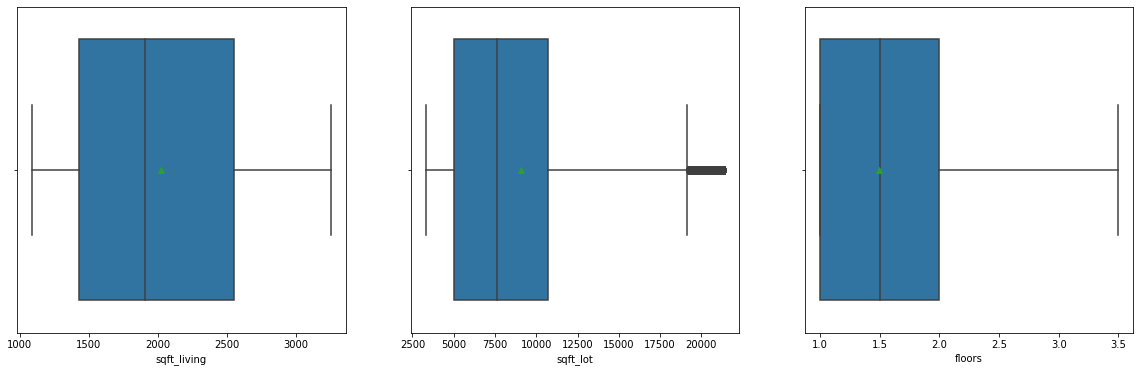

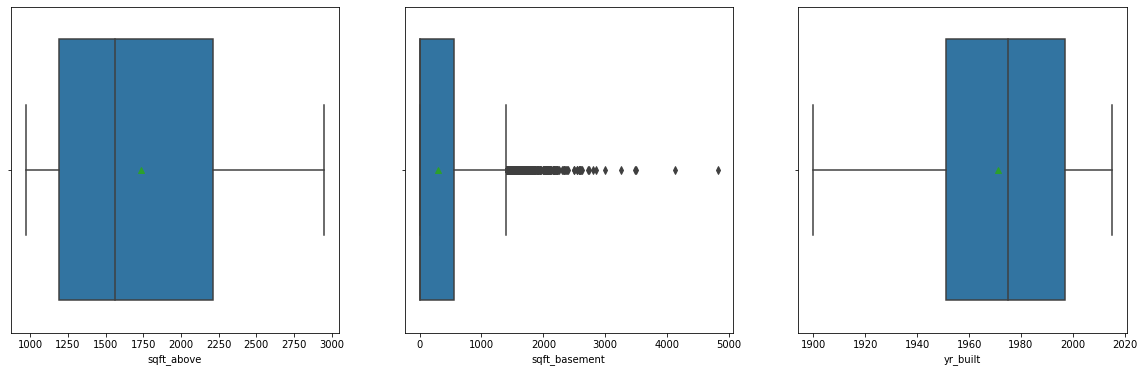

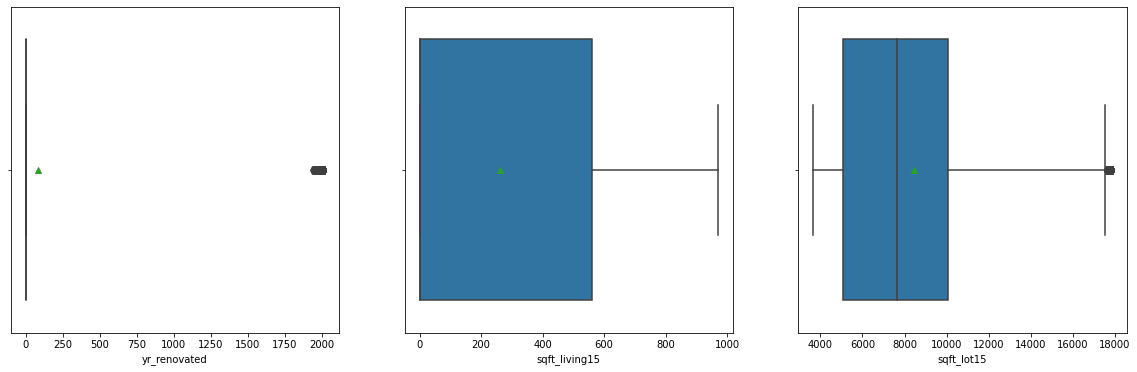

In [ ]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = house_df['price'], ax=ax1, showmeans = True)
sns.boxplot(x = house_df['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = house_df['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_df['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = house_df['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = house_df['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_df['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x = house_df['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x = house_df['yr_built'], ax=ax9, showmeans = True)

fig, (ax10,ax11,ax12) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_df['yr_renovated'], ax=ax10, showmeans = True)
sns.boxplot(x = house_df['sqft_living15'], ax=ax11, showmeans = True)
sns.boxplot(x = house_df['sqft_lot15'], ax=ax12, showmeans = True)

plt.show()

The box plot above shows the distribution of data in the numerical columns after dealing with outliers and anomalies by using median

In [ ]:
#dropping unwanted columns that we wont need for our pedictive analysis
house_df.drop(['id','lat','long'], axis=1, inplace=True)

# **Multiple Linear Regression**

**Checking for Multicollinearity**

In [ ]:
#displaying the correlations between variables
corr=house_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.333796,0.482677,0.668156,0.160885,0.297364,0.126120,0.319342,0.040145,0.681496,0.570396,0.288563,0.057496,0.113229,-0.036699,0.258960,0.150313
bedrooms,0.333796,1.000000,0.522973,0.612056,0.173542,0.199650,-0.013292,0.066384,0.019165,0.388914,0.518574,0.253399,0.204306,0.011075,-0.188958,0.242308,0.174586
bathrooms,0.482677,0.522973,1.000000,0.724999,0.114005,0.516198,0.045337,0.151939,-0.123532,0.633856,0.658776,0.249685,0.541311,0.040710,-0.225246,0.230210,0.108332
sqft_living,0.668156,0.612056,0.724999,1.000000,0.320300,0.359446,0.074568,0.244694,-0.056927,0.724309,0.851460,0.399430,0.331640,0.054841,-0.204982,0.359967,0.309107
sqft_lot,0.160885,0.173542,0.114005,0.320300,1.000000,-0.140915,0.105937,0.141291,0.048515,0.243286,0.294488,0.104158,0.066087,0.024396,-0.273416,0.061007,0.905098
floors,0.297364,0.199650,0.516198,0.359446,-0.140915,1.000000,0.023711,0.029325,-0.263779,0.458151,0.556809,-0.245673,0.489347,0.006156,-0.059025,-0.267613,-0.153576
waterfront,0.126120,-0.013292,0.045337,0.074568,0.105937,0.023711,1.000000,0.401993,0.016652,0.082785,0.057929,0.080585,-0.026159,0.092950,0.030277,0.053041,0.116860
view,0.319342,0.066384,0.151939,0.244694,0.141291,0.029325,0.401993,1.000000,0.045836,0.251378,0.149692,0.276996,-0.053229,0.103208,0.084838,0.234238,0.144987
condition,0.040145,0.019165,-0.123532,-0.056927,0.048515,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.167213,0.174071,-0.361347,-0.060862,0.002962,0.182856,0.060489
grade,0.681496,0.388914,0.633856,0.724309,0.243286,0.458151,0.082785,0.251378,-0.144655,1.000000,0.721911,0.168443,0.446966,0.014372,-0.184795,0.116304,0.248316


In [ ]:
#VIF test
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,2.698397,0.197375,-0.136400,-1.287500,0.065961,-0.201318,-0.052784,-0.203963,-0.125293,-1.387931,0.243059,0.199261,0.850881,-0.019018,0.002516,-0.100473,0.112794
bedrooms,0.197375,1.731795,-0.423743,-0.660356,0.098371,0.090507,0.043160,0.094227,-0.071338,0.113809,-0.424555,0.130492,0.166130,0.045644,0.089988,-0.309066,-0.063421
bathrooms,-0.136400,-0.423743,3.290217,-0.753245,-0.012751,-0.662163,-0.016834,-0.019982,-0.180806,-0.185628,-0.406417,0.264444,-1.075819,-0.268522,0.103964,-0.952738,0.216513
sqft_living,-1.287500,-0.660356,-0.753245,26.367899,-0.322103,1.059386,0.082238,0.358404,-0.015075,0.316595,-23.110292,-1.367189,-0.379846,0.077054,-0.259451,-10.594650,-0.171837
sqft_lot,0.065961,0.098371,-0.012751,-0.322103,5.656314,0.133116,0.012753,-0.004020,0.093630,0.036250,-0.207431,-0.265817,0.242040,0.040510,0.069980,0.272959,-4.972382
floors,-0.201318,0.090507,-0.662163,1.059386,0.133116,2.295859,-0.051367,0.005809,0.080729,-0.161677,-1.559069,0.200528,-0.460295,-0.080025,-0.243994,-0.064240,0.432125
waterfront,-0.052784,0.043160,-0.016834,0.082238,0.012753,-0.051367,1.212116,-0.475500,-0.008525,0.075867,-0.031722,-0.140753,-0.020390,-0.063454,-0.013850,0.142620,-0.119620
view,-0.203963,0.094227,-0.019982,0.358404,-0.004020,0.005809,-0.475500,1.414596,-0.009752,-0.155604,-0.369236,-0.571127,0.081541,-0.027955,-0.127361,0.151620,-0.091637
condition,-0.125293,-0.071338,-0.180806,-0.015075,0.093630,0.080729,-0.008525,-0.009752,1.261554,0.078956,0.165431,-0.063531,0.534784,0.210051,0.153233,0.023873,-0.159689
grade,-1.387931,0.113809,-0.185628,0.316595,0.036250,-0.161677,0.075867,-0.155604,0.078956,3.386478,-1.354495,-0.561533,-0.819122,0.010143,-0.078918,0.081049,-0.292517


From the VIF table we can see that the dataset features have an acceptable range of multicollinearity except sqft_living and sqft_above with around 26 and 24 scores which are too high hence were are going to drop them.

In [ ]:
#making a copy of house_df to deal with multicollinearity
house_df2 = house_df.copy(deep=True)
#dropping sqft_living, sqft_above  &  sqft_living15
house_df2.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [ ]:
# Declaring our X and y variables
X = house_df2.drop('price', axis=1)
y = house_df2.price

from sklearn.linear_model import LinearRegression

# splitting the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the linear regression model on the train set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#display the intercept 
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

498258.26567561325
[  4133.15220659  35630.87086714   1978.43034361  22538.66073336
   3388.54787916  15744.49211641   8297.6743697  133885.82477765
  17115.58706211 -73542.95655313    359.29139184  -1374.60422222
  -4126.6370694 ]


In [ ]:
#predicting the test results to see how the model functions
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[536930.07 680200.  ]
 [520570.54 550000.  ]
 [412600.74 245000.  ]
 ...
 [487149.03 395000.  ]
 [515912.7  489000.  ]
 [422155.99 382500.  ]]


In [ ]:
#assesing model performance

#model evaluation
#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 105068.00401722235
Mean Squared Error: 17567634910.639366
Root Mean Squared Error: 132542.95496419026
R-Squared: 0.5991891028107379


From the above output,our R2 is about 60% of the data.This shows that the model is not performing well.

**Residual Plots**

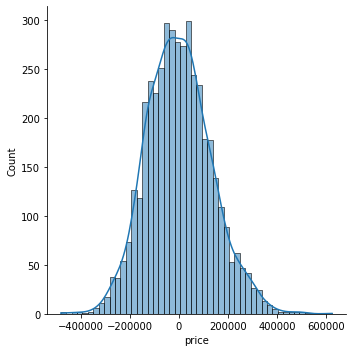

In [ ]:
#residual plot for our predicted values
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show() 

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. 
If the points in a residual plot are randomly dispersed around the horizontal axis,a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.
From our residual plot we can conclude that the distribution of residuals is normal 

**Assessing Heteroskedasticity using Barletts Ttest**

In [ ]:
!pip install pingouin

In [70]:
#Barletts test is used to test if variances across samples are equal
#Ho: Variances are equal across groups
#Ha: Variances are unequal for atleast two groups
#Performing Barlett's test

import pingouin as pg
pg.homoscedasticity(house_df2, method="bartlett", alpha=.05)

,T,pval,equal_var
bartlett,86405.899085,0.0,False


The dataset has heteroskedasticity hence multillinear regression not suitable for this data.

# **Quantile Regression**

**0.25 Quantile Regression**

In [72]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
X = house_df2.grade

y = house_df2.price

# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', house_df2)
res = mod.fit(q=.25)

# Then print out the summary of our model
#
print(res.summary())
# You see that our intercept is  and our slope or the coefficient for our x is 
# These are the parameters for the 0.5th quantile of our y.

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2201
Model:                       QuantReg   Bandwidth:                   2.496e+04
Method:                 Least Squares   Sparsity:                    4.711e+05
Date:                Fri, 23 Jul 2021   No. Observations:                21610
Time:                        15:45:42   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.062e+05   7471.577    -67.754      0.000   -5.21e+05   -4.92e+05
X           1.161e+05    956.759    121.351      0.000    1.14e+05    1.18e+05


**0.5 Quantile**

In [73]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
X = house_df2.grade

y = house_df2.price

# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', house_df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())
# You see that our intercept is  and our slope or the coefficient for our x is 
# These are the parameters for the 0.5th quantile of our y.

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2944
Model:                       QuantReg   Bandwidth:                   2.742e+04
Method:                 Least Squares   Sparsity:                    3.654e+05
Date:                Fri, 23 Jul 2021   No. Observations:                21610
Time:                        15:47:06   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.838e+05   8191.404    -59.056      0.000      -5e+05   -4.68e+05
X           1.258e+05   1057.435    118.920      0.000    1.24e+05    1.28e+05


**0.75 Quantile**

In [74]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
X = house_df2.grade

y = house_df2.price

# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Finding the regression coefficients for, 0.75 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', house_df2)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())
# You see that our intercept is  and our slope or the coefficient for our x is 
# These are the parameters for the 0.5th quantile of our y.

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3253
Model:                       QuantReg   Bandwidth:                   2.342e+04
Method:                 Least Squares   Sparsity:                    3.889e+05
Date:                Fri, 23 Jul 2021   No. Observations:                21610
Time:                        15:47:41   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.831e+05   6917.575    -55.378      0.000   -3.97e+05    -3.7e+05
X            1.27e+05    884.268    143.633      0.000    1.25e+05    1.29e+05


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
 This is our prediction for price based on our model
y_predict = res.predict(X)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
R2  = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", R2)

In [ ]:
#The median quantile regression would be the best to use

# **Ridge Regression**

In [96]:
#data preparation
X = house_df2.drop('price', axis=1)
y = house_df2.price

In [97]:
#splitting the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [98]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
#ridge
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [100]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_) 



# The best_params_ tells us what to set alpha to, which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is. 


{'alpha': 0.001}


17674546797.669956

In [101]:

# We can confirm this by fitting our model with the ridge information and finding the mean squared error below

ridge = Ridge(normalize=True,alpha=0.0001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
sec_model = (np.sqrt(mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test))))
rsecond_model = (r2_score(y_true=y_test,y_pred=ridge.predict(X_test)))
print("MSE: ", second_model)
print("RMSE: ", sec_model)
print("R-squared: ", rsecond_model)

MSE:  17567477613.14361
RMSE:  132542.3615797742
R-squared:  0.5991926916006189


The 0.599 is better than the 0.468 which indicates that Ridge regression is better suited than Multiple Linear Regression. 

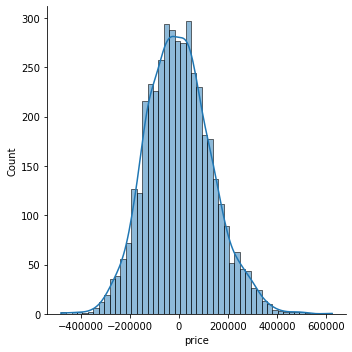

In [103]:
#Residual Plot distribution
y_pred=ridge.predict(X_test)
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show()

In [104]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(ridge.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,4188.010190
bathrooms,35589.434151
sqft_lot,1983.298714
floors,22552.345042
waterfront,3383.956292
view,15784.745081
condition,8326.748194
grade,133631.902413
sqft_basement,17143.587459
yr_built,-73312.394351


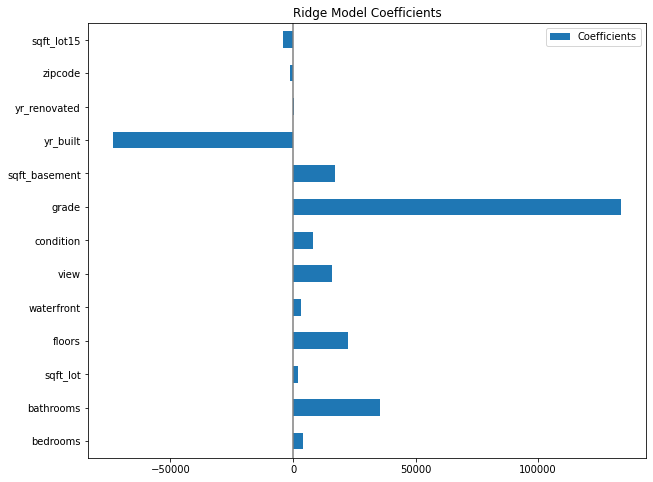

In [106]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge Model Coefficients')
plt.axvline(x=0, color='.5')
plt.show()

In [107]:
# Making predictions & checking accuracy using R2 score
r2 = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", r2)

The R2 score for the ridge model is: 0.599223750707517


Ridge model proved to provide an effective model than quantile regresion and multiple linear regression

# **Lasso Regression**

In [110]:
# Features and label
X = house_df2.drop('price', axis=1)
y = house_df2['price']

In [111]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [112]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
#setting parameter space
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch.
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#lasso regression
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
print("lasso R-squared:", r2_score(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5991795486134488
lasso MSE: 17568053673.330246
lasso RMSE: 132544.53467921732
lasso R-squared: 0.5991795486134488
lasso best estimator coef: [  4124.7   35630.06   1741.27  22499.93   3367.62  15738.14   8278.03
 133866.78  17098.44 -73493.16    347.16  -1328.79  -3871.95]


In [114]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(gridlasso.best_estimator_.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,4124.703305
bathrooms,35630.064543
sqft_lot,1741.272158
floors,22499.929685
waterfront,3367.621229
view,15738.141861
condition,8278.026720
grade,133866.784024
sqft_basement,17098.438596
yr_built,-73493.156683


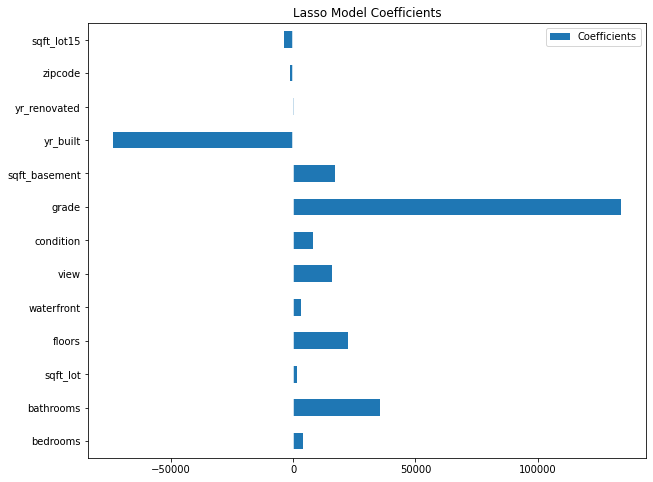

In [116]:
#Displaying coefficients
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Lasso Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()

In [ ]:
#Lasso regression model gave a slightly higher MSE than ridge regression,though the R2 was alost same it proved to provide a similarmodel to ridge.
#all features are equally important in predicting the house price

# **Elastic Net Regression**

In [118]:
# Features and label
X = house_df2.drop('price', axis=1)
y = house_df2['price']

In [119]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [120]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model) 

17675303939.741066


In [122]:
# Elastic Net Model
 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [123]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


17761184692.414192

In [129]:
# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
#The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)

elastic.fit(X_train,y_train)
third_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
th_m = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
third_m = r2_score(y_true=y_test,y_pred=elastic.predict(X_test))
print("MSE: ", third_model)
print("RMSE:", th_m)
print("R-squared: ", third_m)

MSE:  17684859453.401375
RMSE: 132984.43312433743
R-squared:  0.5974193937864007


In [125]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 36261.08937012615,
 'bedrooms': 4178.530270791242,
 'condition': 8249.878343447788,
 'floors': 22646.72547158185,
 'grade': 133209.2373135878,
 'sqft_basement': 16788.623829272594,
 'sqft_lot': 2605.014801166406,
 'sqft_lot15': -4668.275780847955,
 'view': 14921.679595958907,
 'waterfront': 5216.3101816994185,
 'yr_built': -74401.39292215064,
 'yr_renovated': 469.8954044786062,
 'zipcode': -711.1033783746134}

In [126]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(elastic.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,5664.158948
bathrooms,35115.913830
sqft_lot,2623.627461
floors,22984.353951
waterfront,4983.304078
view,16065.878650
condition,9037.657824
grade,126054.654969
sqft_basement,17566.752206
yr_built,-67952.036419


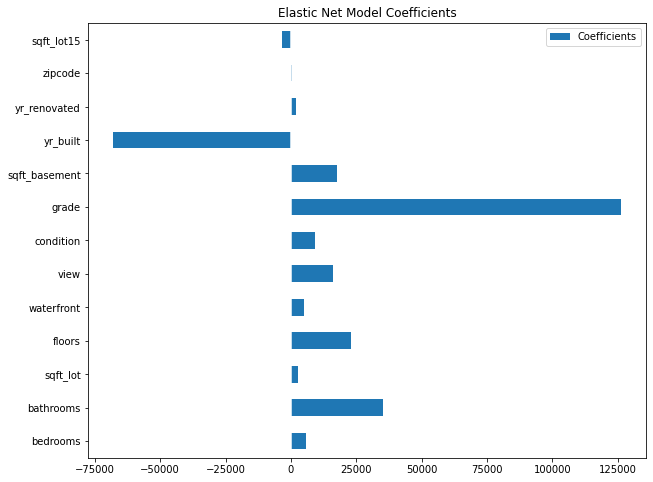

In [127]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Elastic Net Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()

Elastic Net model provided the best model in comparison to Ridge, Lasso, MLR and Quantile Regression(0.25,0.5 & 0.75 quantiles)
It performed feature selection and still maintained the correlated features in the model.

# **7.Challenging the Solution**


All the predictive models we tried so far (except quantile regression) had an accuracy score of about 60% which an average accuracy score since it is above 50%

From these results we can conclude that regression models may not be the best predictive models for this dataset and is possible to improve the models used above by trying other Regression types such as Polynomial Regression.

# **8.Follow up Questions**

**a).Did we have the right Data?**

Yes,we had some of the right data since most regresson models explained a variance of about 59% and some 60%.

**b).Do we need other data to answer our question?**

probaby more variables/features would be needed for better house price predictions.

**c).Did we have the right question?**

We had the right question and it was well explored but we needed more data explaining the house prices for effecive predictions.